In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [141]:
path = r"C:\Users\gagan\Desktop\Mission Robosoft\Datasets\crop_yield.csv"
df = pd.read_csv(path)

In [142]:
df.iloc[:, :4].head(5)

,Crop,Crop_Year,Season,State
0,Arecanut,1997,Whole Year,Assam
1,Arhar/Tur,1997,Kharif,Assam
2,Castor seed,1997,Kharif,Assam
3,Coconut,1997,Whole Year,Assam
4,Cotton(lint),1997,Kharif,Assam


In [143]:
df.iloc[:, 4:8].head(5)

,Area,Production,Annual_Rainfall,Fertilizer
0,73814.0,56708,2051.4,7024878.38
1,6637.0,4685,2051.4,631643.29
2,796.0,22,2051.4,75755.32
3,19656.0,126905000,2051.4,1870661.52
4,1739.0,794,2051.4,165500.63


In [144]:
df.iloc[:, 8:].head(5)

,Pesticide,Yield
0,22882.34,0.796087
1,2057.47,0.710435
2,246.76,0.238333
3,6093.36,5238.051739
4,539.09,0.420909


In [145]:
df.nunique()

Crop                  55
Crop_Year             24
Season                 6
State                 30
Area               13644
Production         14016
Annual_Rainfall      634
Fertilizer         18598
Pesticide          17405
Yield              13551
dtype: int64

In [146]:
df.duplicated().sum()

0

In [147]:
df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [148]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [149]:
df.describe(include = 'object')

,Crop,Season,State
count,19689,19689,19689
unique,55,6,30
top,Rice,Kharif,Karnataka
freq,1197,8232,1432


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [151]:
df.nunique()

Crop                  55
Crop_Year             24
Season                 6
State                 30
Area               13644
Production         14016
Annual_Rainfall      634
Fertilizer         18598
Pesticide          17405
Yield              13551
dtype: int64

In [152]:
df['Crop_Year'].unique()

array([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020], dtype=int64)

In [153]:
#How have crop production trends evolved across different European countries over the last 15 years
crop_production_trend = df[(df['Crop_Year'] > 2005) & (df['Crop_Year'] <= 2020)].groupby(['Crop_Year', 'Crop'])['Production'].sum()
crop_production_trend.reset_index().sort_values(by = ['Crop_Year', 'Production'], ascending = [True, False])

,Crop_Year,Crop,Production
9,2006,Coconut,15067607265
45,2006,Sugarcane,334295217
39,2006,Rice,92023239
52,2006,Wheat,70106630
11,2006,Cotton(lint),20764043
...,...,...,...
768,2020,Moth,24
770,2020,Other Rabi pulses,21
767,2020,Moong(Green Gram),11
783,2020,Tobacco,6


<Axes: title={'center': 'Close Look'}, xlabel='Crop_Year,Crop'>

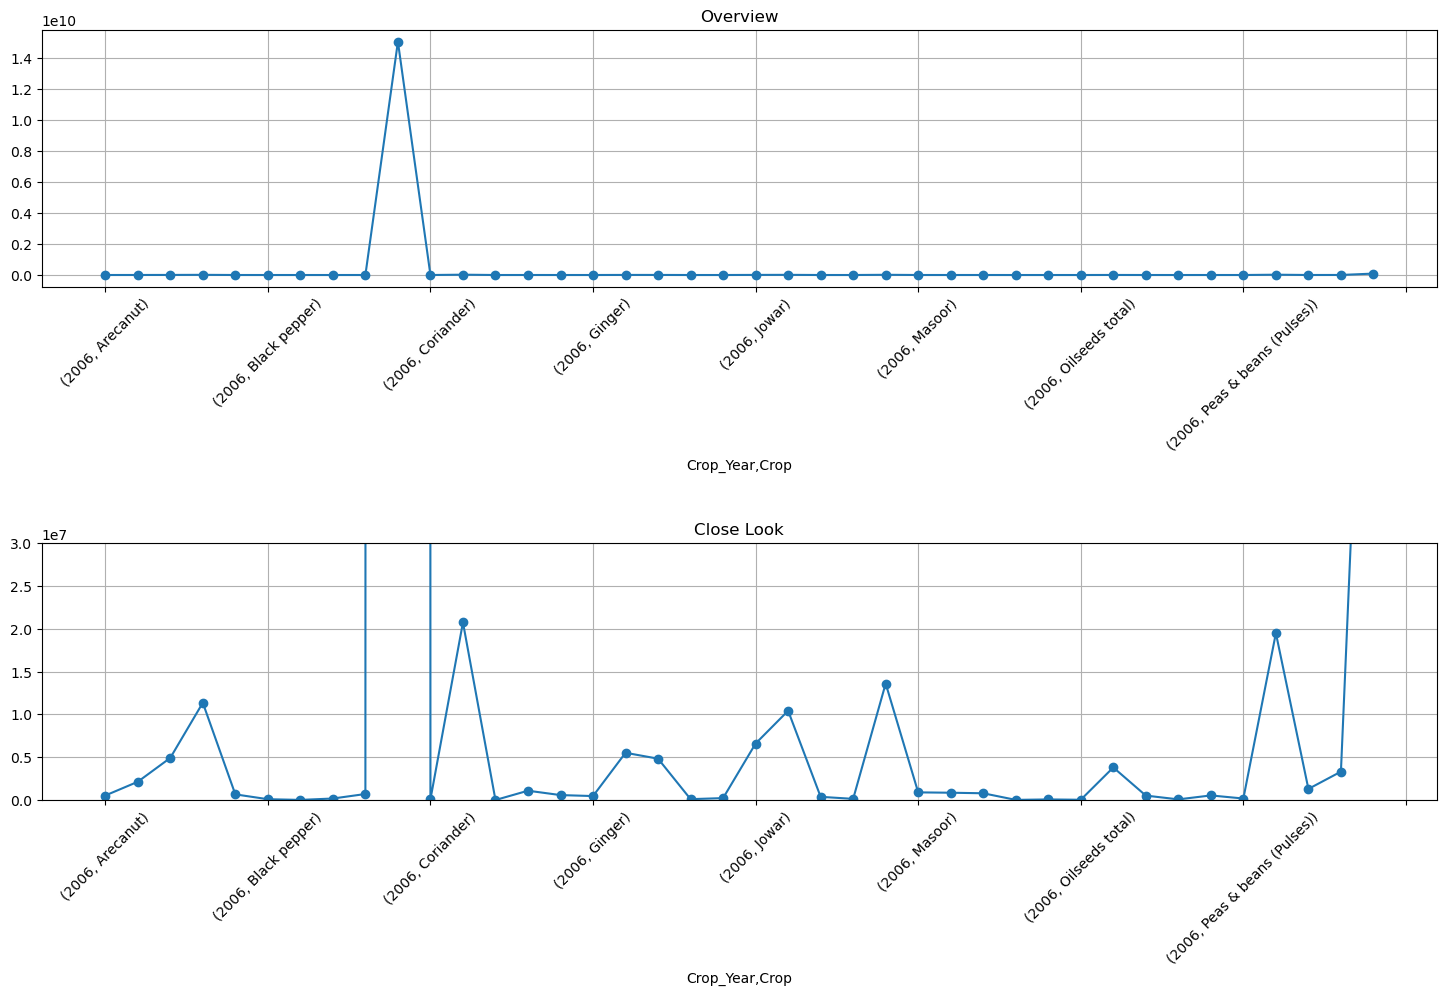

In [154]:
fig, axes = plt.subplots(2, 1, figsize=(18, 10))
plt.subplots_adjust(hspace = 1.0)
crop_production_trend[:40].plot(kind = 'line', rot = 45, grid = True, marker = 'o', ax = axes[0], title = 'Overview')
crop_production_trend[:40].plot(kind = 'line', rot = 45, grid = True, marker = 'o', ylim = (0, 30000000), ax = axes[1], title = 'Close Look')

In [155]:
#What are the key factors influencing yield variations across different regions
yield_variations = df[(df['Crop_Year'] == 2020)].groupby(['State', 'Crop', 'Annual_Rainfall', 'Fertilizer', 'Pesticide'])['Yield'].mean()
yield_variations.reset_index().sort_values(by = ['Annual_Rainfall', 'Yield'], ascending = [False, False])[:5]

,State,Crop,Annual_Rainfall,Fertilizer,Pesticide,Yield
27,Uttarakhand,Sugarcane,1313.947826,17460524.24,33368.08,81.540000
12,Uttarakhand,Onion,1313.947826,695059.90,1328.30,14.184615
18,Uttarakhand,Potato,1313.947826,1050721.47,2007.99,11.830000
19,Uttarakhand,Potato,1313.947826,1165532.20,2227.40,9.942000
2,Uttarakhand,Garlic,1313.947826,1034845.45,1977.65,6.603478


In [156]:
#Which crops have demonstrated the highest resilience to seasonal changes
crop_yield = df.groupby(['Crop_Year', 'Crop', 'Annual_Rainfall'])['Yield'].mean().reset_index()
crop_resilience = df.groupby('Crop')['Yield'].std().reset_index()
crop_resilience.columns = ['Crop', 'Yield_Std_Dev']
crop_resilience = crop_resilience.sort_values(by='Yield_Std_Dev', ascending=True)

In [157]:
print(crop_yield[:5])

   Crop_Year      Crop  Annual_Rainfall     Yield
0       1997  Arecanut           1266.7  1.293571
1       1997  Arecanut           1852.9  1.691765
2       1997  Arecanut           2051.4  0.796087
3       1997  Arecanut           3252.4  1.147857
4       1997  Arecanut           3818.2  1.245714


In [158]:
print(crop_resilience[:5]) 
#here calculated Yield_Std_Dev per crop – lower values indicate more resilience.

          Crop  Yield_Std_Dev
23     Linseed       0.223668
19  Horse-gram       0.225087
22     Khesari       0.228552
41   Safflower       0.237030
25      Masoor       0.239129


<Axes: xlabel='Crop_Year,State,Annual_Rainfall'>

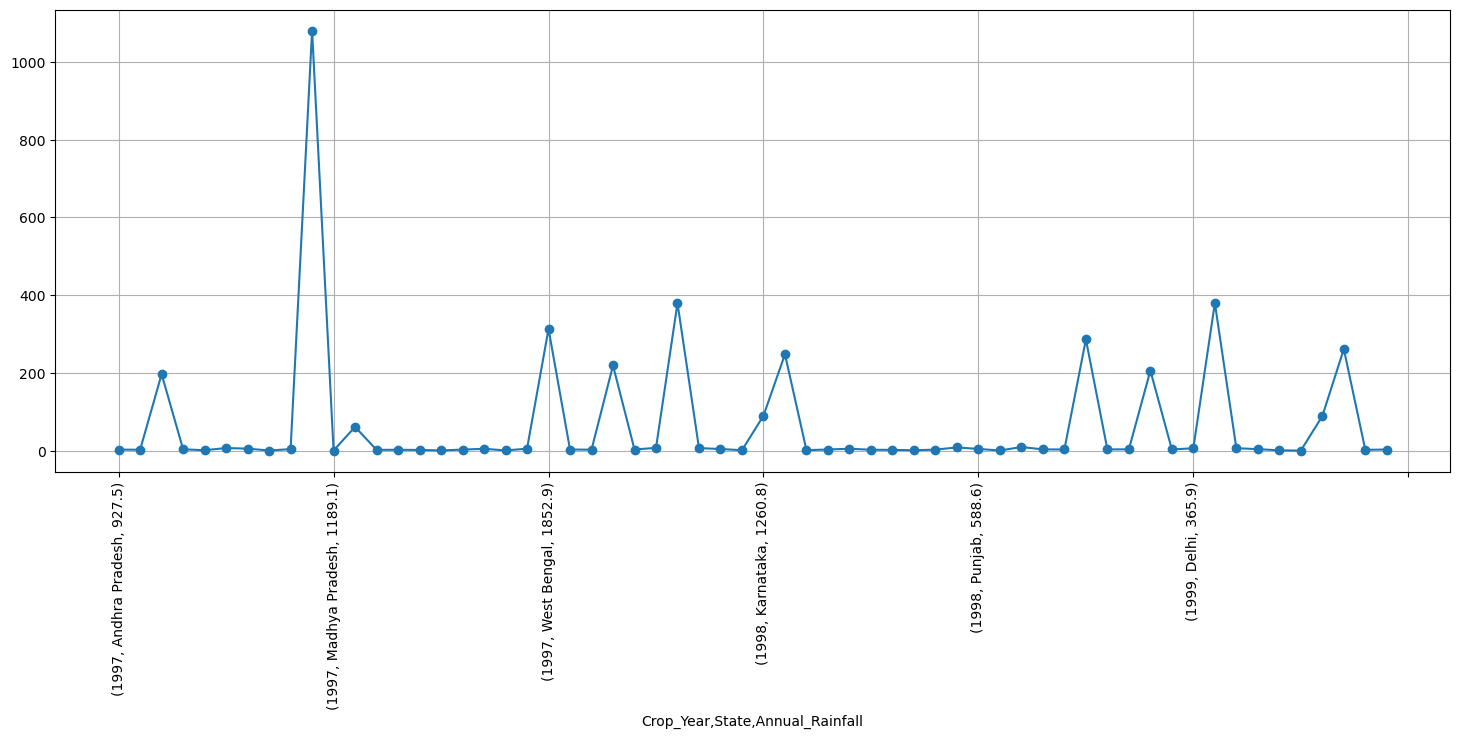

In [159]:
#How does rainfall variability affect crop production in different countries
df.groupby(['Crop_Year', 'State', 'Annual_Rainfall'])['Yield'].mean()[:60].plot(kind = 'line', figsize = (18, 6), rot = 90, marker = 'o', grid = True)

In [160]:
#What is the correlation between fertilizer usage and yield efficiency
df['Fertilizer'].corr(df['Yield'])

0.0028618642682307085

<Axes: xlabel='State'>

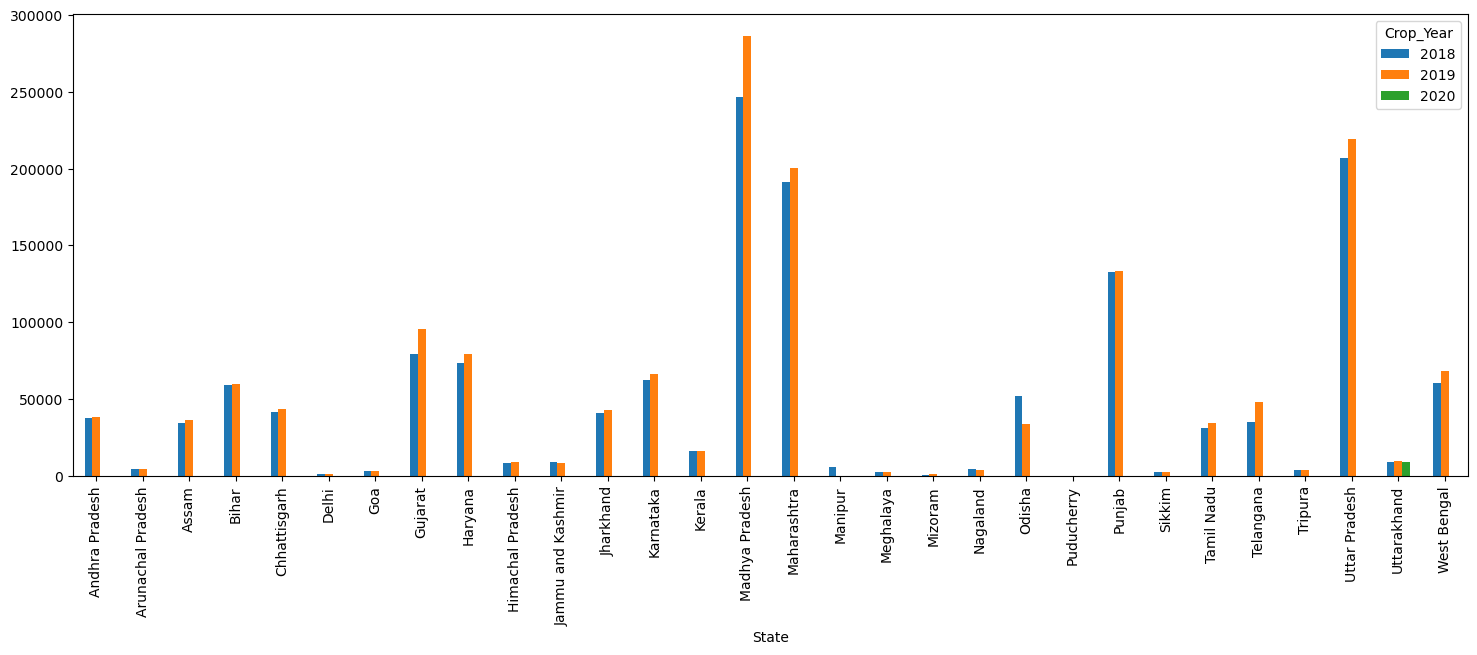

In [161]:
#Are there significant shifts in pesticide usage trends across seasons and regions?
df[(df['Crop_Year'] > 2017)].groupby(['Crop_Year', 'State'])['Pesticide'].mean().unstack('Crop_Year').plot(kind = "bar", figsize = (18, 6))

In [162]:
#Which crops are most sensitive to fluctuations in rainfall and climate
crop_fluctuations = df[(df['Crop_Year']  == 2017)].groupby(['Crop_Year', 'Annual_Rainfall', 'Crop'])['Yield'].mean()
crop_fluctuations.reset_index().sort_values(by = ['Crop_Year', 'Annual_Rainfall'], ascending = [True, True])

,Crop_Year,Annual_Rainfall,Crop,Yield
0,2017,417.1,Arhar/Tur,1.108333
1,2017,417.1,Bajra,1.690476
2,2017,417.1,Barley,3.711333
3,2017,417.1,Castor seed,1.000000
4,2017,417.1,Coriander,2.690588
...,...,...,...,...
821,2017,4472.3,Sweet potato,3.694545
822,2017,4472.3,Tapioca,7.553636
823,2017,4472.3,Tobacco,1.055000
824,2017,4472.3,Turmeric,5.915455


<Axes: xlabel='Crop_Year,Annual_Rainfall,Crop'>

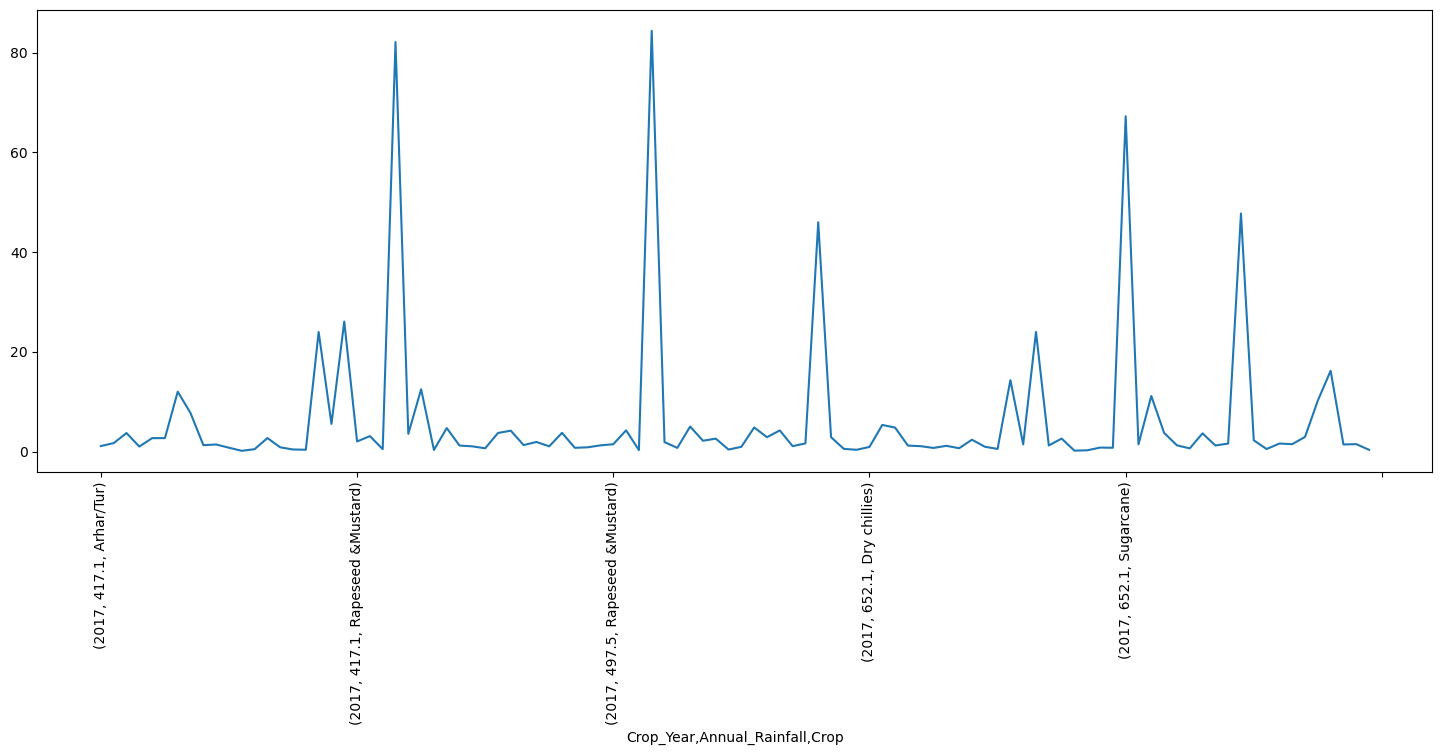

In [163]:
crop_fluctuations[:100].plot(kind = "line", figsize= (18, 6), rot = 90)

In [164]:
#Which crops have shown the highest production growth over the years?
df.groupby(["Crop_Year", "Crop"])['Production'].sum().reset_index().sort_values(by = ['Crop_Year', 'Production'], ascending = [True, False])

,Crop_Year,Crop,Production
9,1997,Coconut,5643107340
42,1997,Sugarcane,200252854
36,1997,Rice,61127362
49,1997,Wheat,57999331
27,1997,Niger seed,38681541
...,...,...,...
1240,2020,Moth,24
1242,2020,Other Rabi pulses,21
1239,2020,Moong(Green Gram),11
1255,2020,Tobacco,6


In [165]:
df.loc[df.groupby("Crop_Year")['Production'].idxmax()]

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
60,Coconut,1997,Whole Year,Kerala,884344.00,5210000000,3252.400000,8.416302e+07,274146.6400,5376.054286
246,Coconut,1998,Whole Year,Kerala,882288.00,5132000000,3151.500000,8.717005e+07,255863.5200,5304.749286
378,Coconut,1999,Whole Year,Kerala,925035.00,5680000000,2914.600000,9.817396e+07,249759.4500,5581.025714
646,Coconut,2000,Whole Year,Kerala,925783.00,5536000000,2412.600000,9.088412e+07,240703.5800,5617.002143
911,Coconut,2001,Whole Year,Kerala,905718.00,5479000000,2946.700000,9.250098e+07,235486.6800,5636.355000
1118,Coconut,2002,Whole Year,Kerala,899198.00,5709000000,2511.200000,8.512707e+07,224799.5000,5969.780000
1381,Coconut,2003,Whole Year,Kerala,898498.00,5876000000,2386.000000,8.893333e+07,215639.5200,6097.778571
1584,Coconut,2004,Whole Year,Kerala,899267.00,6001000000,2880.200000,9.742659e+07,188846.0700,6112.145714
1822,Coconut,2005,Whole Year,Kerala,897833.00,6326000000,3030.900000,1.076681e+08,188544.9300,6500.859286
2141,Coconut,2006,Whole Year,Kerala,872943.00,6054000000,3429.700000,1.114836e+08,192047.4600,6522.320000


In [166]:
df.groupby("Crop_Year").apply(lambda x: x.nlargest(3, 'Production')).reset_index(drop=True)

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Coconut,1997,Whole Year,Kerala,884344.0,5210000000,3252.400000,8.416302e+07,274146.64,5376.054286
1,Coconut,1997,Whole Year,West Bengal,24273.0,306202300,1852.900000,2.310061e+06,7524.63,13003.787780
2,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.400000,1.870662e+06,6093.36,5238.051739
3,Coconut,1998,Whole Year,Kerala,882288.0,5132000000,3151.500000,8.717005e+07,255863.52,5304.749286
4,Coconut,1998,Whole Year,Karnataka,310399.0,1611530000,1260.800000,3.066742e+07,90015.71,4692.261111
...,...,...,...,...,...,...,...,...,...,...
67,Coconut,2019,Whole Year,Tamil Nadu,438935.0,4946800000,910.100000,7.539148e+07,162405.95,8795.260556
68,Coconut,2019,Whole Year,Kerala,760776.0,4814000000,3119.200000,1.306709e+08,281487.12,5882.037143
69,Sugarcane,2020,Whole Year,Uttarakhand,90184.0,7970299,1313.947826,1.746052e+07,33368.08,81.540000
70,Wheat,2020,Rabi,Uttarakhand,297189.0,937003,1313.947826,5.753876e+07,109959.93,2.216154


In [167]:
#What is the average production of each crop per year?
df.groupby(["Crop_Year", "Crop"])['Production'].sum().reset_index().sort_values(by = ['Crop_Year', 'Production'], ascending = [True, False])

,Crop_Year,Crop,Production
9,1997,Coconut,5643107340
42,1997,Sugarcane,200252854
36,1997,Rice,61127362
49,1997,Wheat,57999331
27,1997,Niger seed,38681541
...,...,...,...
1240,2020,Moth,24
1242,2020,Other Rabi pulses,21
1239,2020,Moong(Green Gram),11
1255,2020,Tobacco,6


In [192]:
#How does production vary between different seasons
print(df[(df['Season'] == 'Whole Year ')].groupby(['Season', 'Crop_Year'])['Production'].mean().astype(int).reset_index().sort_values(by = ['Production'], ascending = [False])[:1])
print(df[(df['Season'] == 'Whole Year ')].groupby(['Season', 'Crop_Year'])['Production'].mean().astype(int).reset_index().sort_values(by = ['Production'], ascending = [False])[-1:])

         Season  Crop_Year  Production
18  Whole Year        2015   125805090
         Season  Crop_Year  Production
23  Whole Year        2020     1612759


In [203]:
#Which states have the most diverse crop production?
df.groupby(['State'])['Crop'].nunique().sort_values(ascending = False)[:10]

State
Andhra Pradesh    46
Karnataka         45
Tamil Nadu        45
Madhya Pradesh    45
Chhattisgarh      43
West Bengal       42
Bihar             42
Telangana         40
Odisha            40
Nagaland          39
Name: Crop, dtype: int64

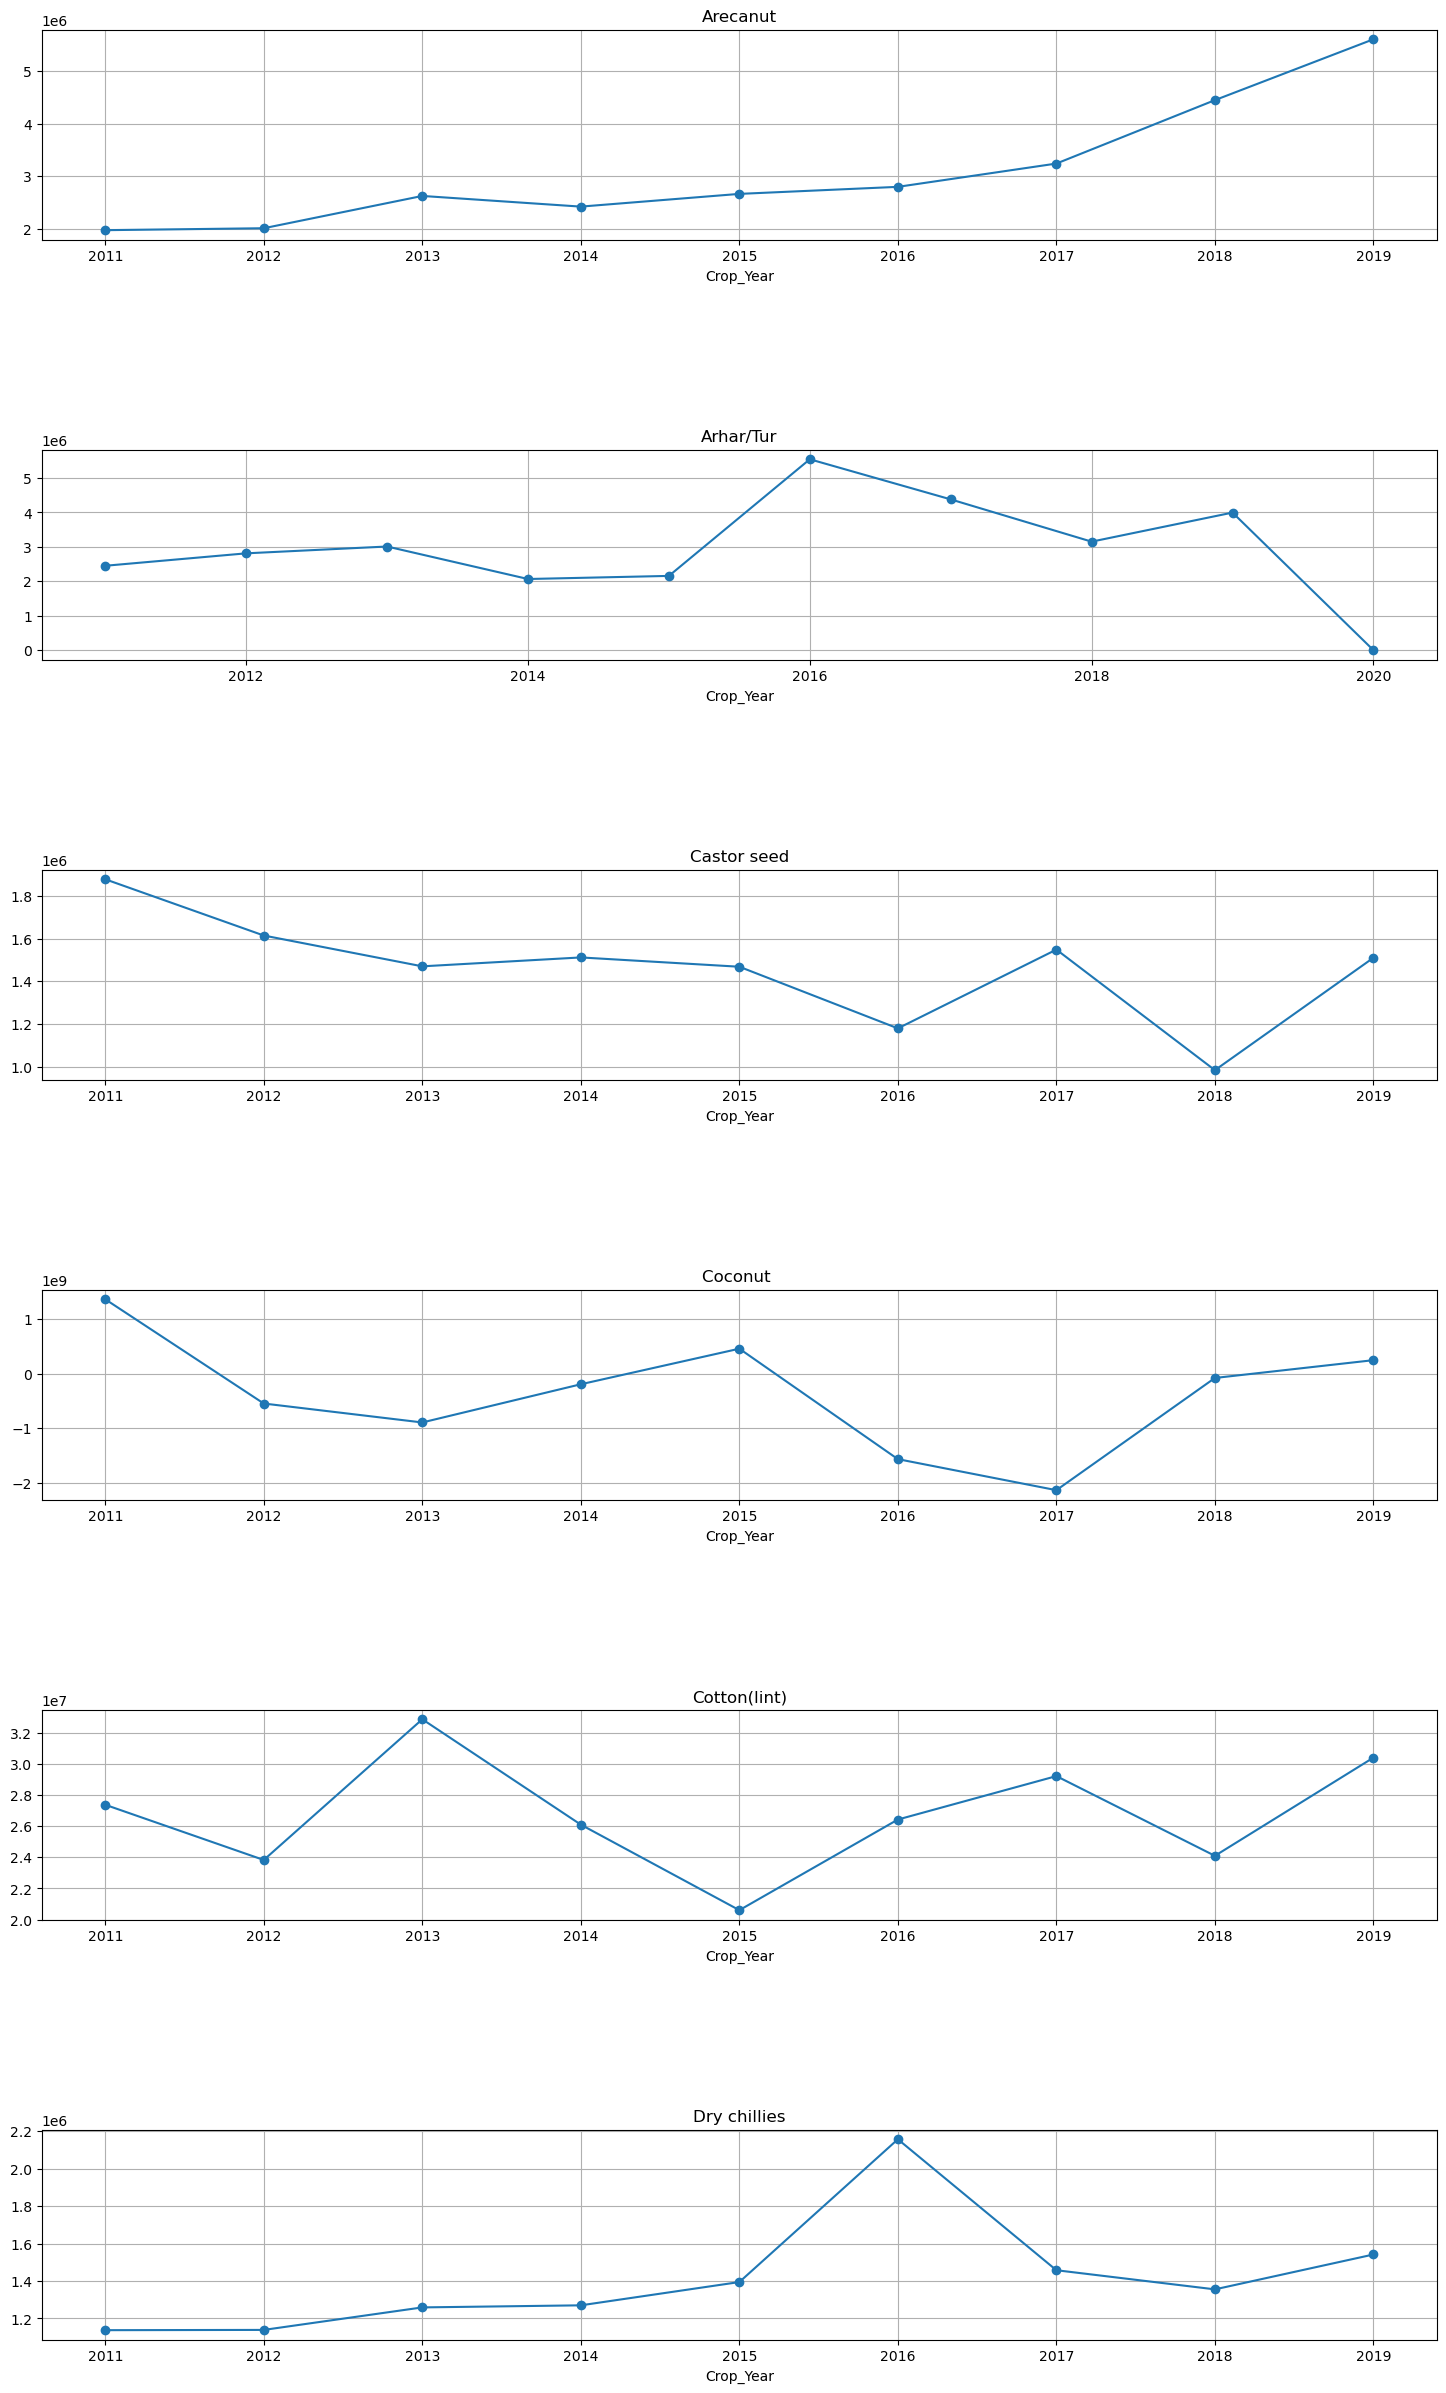

In [244]:
#What is the overall trend of crop production over the past 10 years
columns = list(df['Crop'].unique())

ffig, axes = plt.subplots(min(len(columns), 6), 1, figsize=(18, 30))
plt.subplots_adjust(hspace = 1)
for count, crop in enumerate(columns):
    df[(df['Crop_Year'] > 2010) & (df['Crop'] == crop)].groupby(['Crop_Year'])['Production'].sum().astype(int).plot(kind = 'line', ax = axes[count], marker = 'o', grid = True, title = crop)
    if count == 5:
        break

In [249]:
#How does annual rainfall impact crop production
df.groupby(['Crop_Year', 'Annual_Rainfall'])['Production'].sum().astype(int)

Crop_Year  Annual_Rainfall
1997       473.900000         170472940
           661.200000          20009400
           690.100000          29301700
           798.900000          27238100
           927.500000          28552600
                                ...    
2019       2740.000000           100782
           3119.200000        523089106
           3844.400000           948652
           4489.500000        167213945
2020       1313.947826         10177226
Name: Production, Length: 657, dtype: int32

In [260]:
#Which states have the highest and lowest yields
print(df.groupby(['State'])['Yield'].sum().sort_values(ascending = False)[:1])
print(df.groupby(['State'])['Yield'].sum().sort_values(ascending = False)[-1:])

State
West Bengal    291986.752179
Name: Yield, dtype: float64
State
Sikkim    278.625476
Name: Yield, dtype: float64


In [262]:
#What is the total area cultivated per year
df.groupby(['Crop_Year'])['Area'].sum().astype(int)

Crop_Year
1997    166068574
1998    150123778
1999    147057393
2000    147527729
2001    145694329
2002    142785766
2003    149696843
2004    148024472
2005    147918314
2006    152249118
2007    152486069
2008    150964656
2009    148668461
2010    158189369
2011    154412050
2012    158536017
2013    157564435
2014    154436550
2015    155935936
2016    160364906
2017    162500116
2018    161359528
2019    169091910
2020       917916
Name: Area, dtype: int32

In [263]:
df.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

In [268]:
#Which crop requires the most fertilizer per unit of production
df['Fertilizer_Intensity'] = df['Fertilizer'] / df['Production']
df.groupby('Crop')['Fertilizer_Intensity'].mean().idxmax()

'Arecanut'

In [272]:
#What is the effect of pesticide usage on overall yield
correlation = df[['Pesticide', 'Yield']].corr()
print(correlation)

           Pesticide     Yield
Pesticide   1.000000  0.001782
Yield       0.001782  1.000000
